Load Master Dataset

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("output/uidai_master_clean.csv")
df.head()

,date,state,district,age_0_5,age_5_17,age_18_greater,total_enrolment,demo_age_5_17,demo_age_17_,total_demographic_updates,bio_age_5_17,bio_age_17_,total_biometric_updates,enrolment_available,demo_data_available,bio_data_available
0,2025-01-03,Andaman And Nicobar Islands,Nicobar,0.0,0.0,0.0,0.0,16.0,180.0,196.0,178.0,101.0,279.0,0,1,1
1,2025-01-03,Andaman And Nicobar Islands,North And Middle Andaman,0.0,0.0,0.0,0.0,0.0,0.0,0.0,470.0,347.0,817.0,0,0,1
2,2025-01-03,Andaman And Nicobar Islands,South Andaman,0.0,0.0,0.0,0.0,48.0,279.0,327.0,948.0,450.0,1398.0,0,1,1
3,2025-01-03,Andhra Pradesh,Alluri Sitharama Raju,0.0,0.0,0.0,0.0,194.0,2111.0,2305.0,585.0,1408.0,1993.0,0,1,1
4,2025-01-03,Andhra Pradesh,Anakapalli,0.0,0.0,0.0,0.0,130.0,804.0,934.0,218.0,234.0,452.0,0,1,1


Date Standardization

In [30]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")


Detect & Remove Invalid State/District Values

In [7]:
invalid_values = ["0", 0, "100000", "?", None, np.nan]


df = df[~df["state"].isin(invalid_values)]
df = df[~df["district"].isin(invalid_values)]

Missing Values Analysis

In [8]:
df.isnull().sum()

date                         0
state                        0
district                     0
age_0_5                      0
age_5_17                     0
age_18_greater               0
total_enrolment              0
demo_age_5_17                0
demo_age_17_                 0
total_demographic_updates    0
bio_age_5_17                 0
bio_age_17_                  0
total_biometric_updates      0
enrolment_available          0
demo_data_available          0
bio_data_available           0
dtype: int64

Duplicate Check

In [9]:
df.duplicated(subset=["date", "state", "district"]).sum()

np.int64(0)

📈 Exploratory Data Analysis (EDA)

In [10]:
df.describe()

,age_0_5,age_5_17,age_18_greater,total_enrolment,demo_age_5_17,demo_age_17_,total_demographic_updates,bio_age_5_17,bio_age_17_,total_biometric_updates,enrolment_available,demo_data_available,bio_data_available
count,92198.000000,92198.000000,92198.000000,92198.000000,92198.000000,92198.000000,92198.000000,92198.000000,92198.000000,92198.000000,92198.000000,92198.000000,92198.000000
mean,27.368880,14.649352,1.320495,43.338728,40.344899,362.692792,403.037691,321.792978,330.907037,652.700015,0.462808,0.877524,0.597931
std,108.181268,87.363602,18.634791,197.268372,155.579977,1448.058148,1584.842112,1456.991671,1582.970657,2903.390615,0.498618,0.327836,0.490318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,16.000000,19.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,11.000000,94.000000,107.000000,14.000000,13.000000,30.000000,0.000000,1.000000,1.000000
75%,25.000000,6.000000,0.000000,35.000000,32.000000,275.000000,310.000000,186.000000,182.000000,387.000000,1.000000,1.000000,1.000000
max,6740.000000,6096.000000,1838.000000,12219.000000,7128.000000,53488.000000,58306.000000,56618.000000,51939.000000,83938.000000,1.000000,1.000000,1.000000


In [11]:
df.describe().to_csv("output/eda_summary.csv")

Clean State & District Lists (Final)

In [12]:
states = sorted(df["state"].unique())
districts = sorted(df["district"].unique())


pd.Series(states).to_csv("output/state_list.csv", index=False)
pd.Series(districts).to_csv("output/district_list.csv", index=False)

State-Level Totals

In [13]:
state_summary = df.groupby("state", as_index=False)[
["total_enrolment",
"total_demographic_updates",
"total_biometric_updates"]
].sum()

District-Level Totals

In [14]:
district_summary = df.groupby(["state", "district"], as_index=False)[
["total_enrolment",
"total_demographic_updates",
"total_biometric_updates"]
].sum()

📊 Data Availability Insights

In [15]:
{
"Enrolment Available": (df["enrolment_available"] == 1).sum(),
"Demographic Available": (df["demo_data_available"] == 1).sum(),
"Biometric Available": (df["bio_data_available"] == 1).sum()
}

{'Enrolment Available': np.int64(42670),
 'Demographic Available': np.int64(80906),
 'Biometric Available': np.int64(55128)}

In [16]:
sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (12, 6)

Missing Values Heatmap

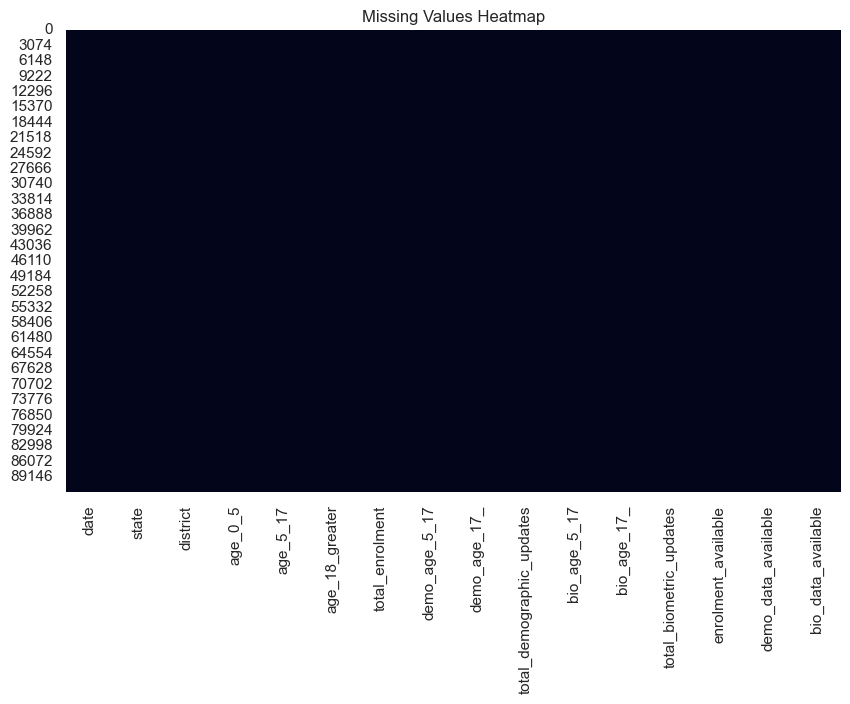

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


Total Enrolment vs Updates

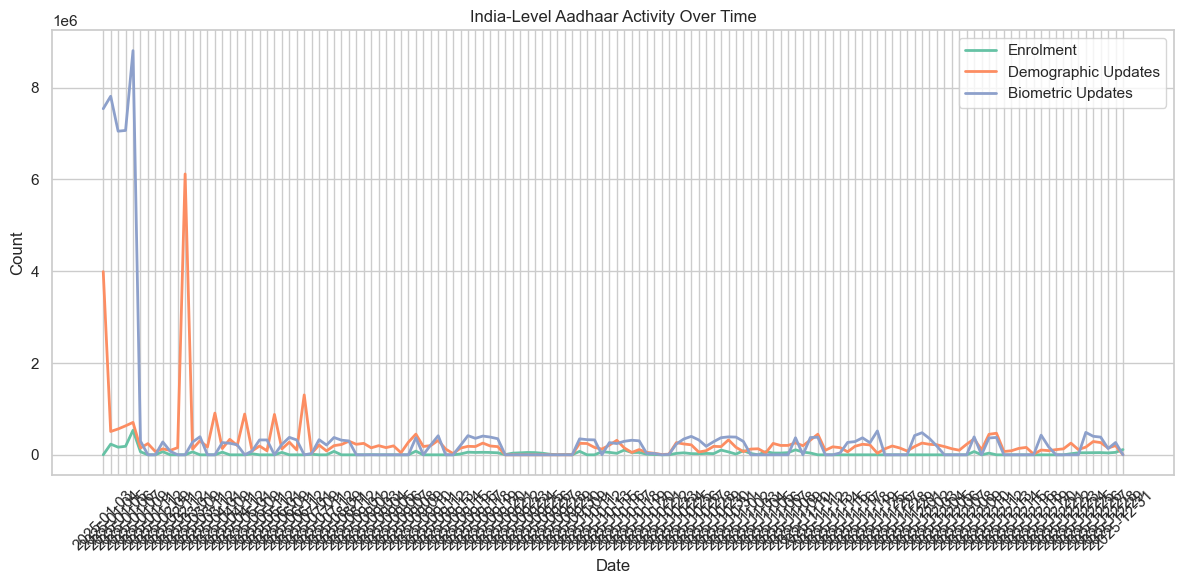

In [18]:
daily = df.groupby("date").sum(numeric_only=True).reset_index()

plt.plot(daily["date"], daily["total_enrolment"], label="Enrolment", linewidth=2)
plt.plot(daily["date"], daily["total_demographic_updates"], label="Demographic Updates", linewidth=2)
plt.plot(daily["date"], daily["total_biometric_updates"], label="Biometric Updates", linewidth=2)

plt.legend()
plt.title("India-Level Aadhaar Activity Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Stacked Area Chart – Enrolment by Age

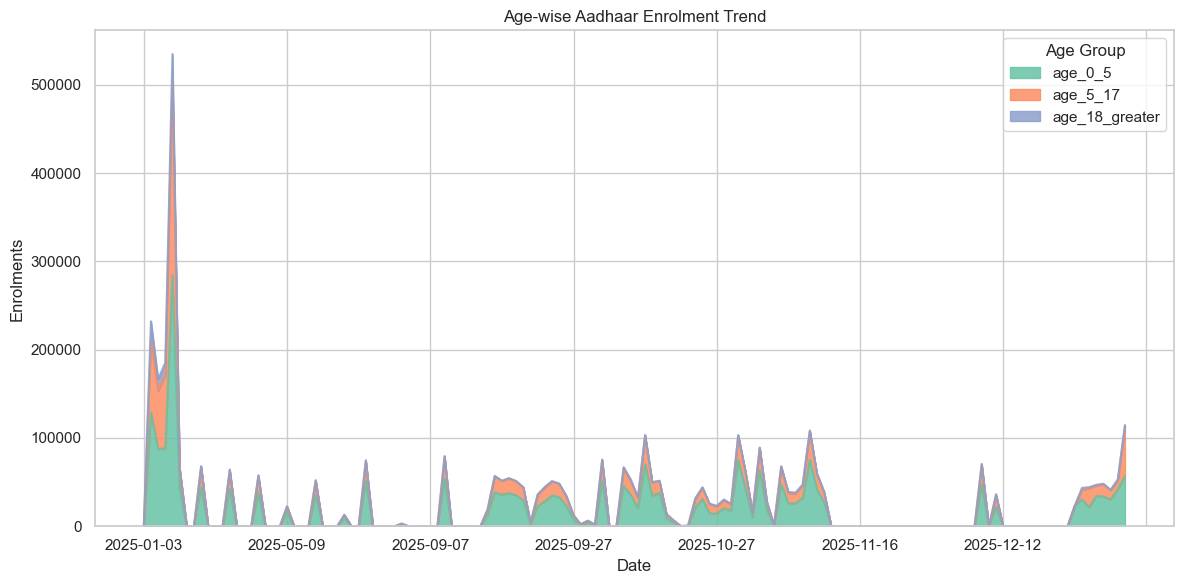

In [19]:
age_daily = df.groupby("date")[["age_0_5", "age_5_17", "age_18_greater"]].sum()

age_daily.plot(
    kind="area",
    stacked=True,
    alpha=0.85
)

plt.title("Age-wise Aadhaar Enrolment Trend")
plt.xlabel("Date")
plt.ylabel("Enrolments")
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()


State-wise Comparison (Top 10)

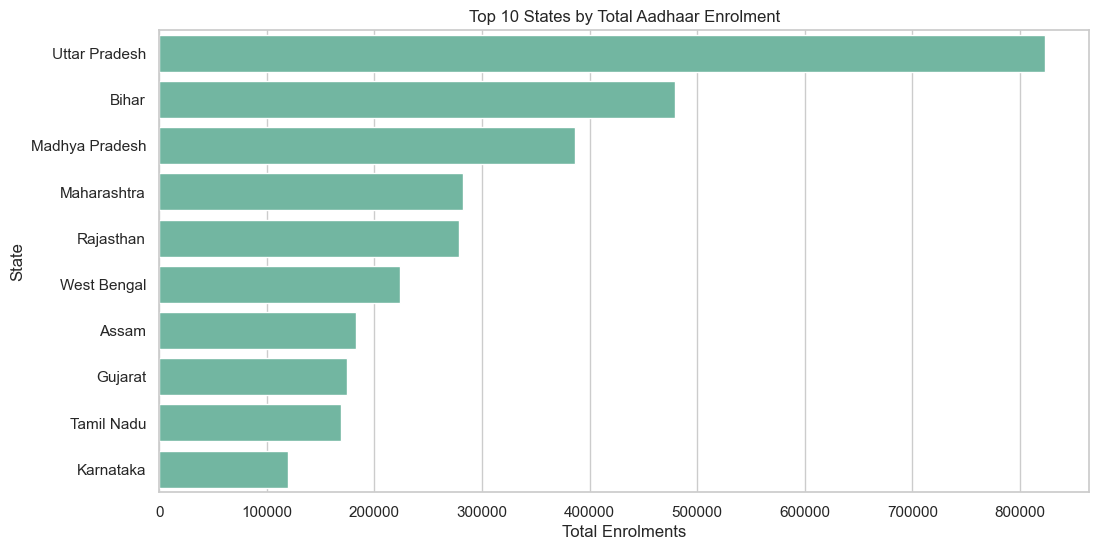

In [20]:
top_states = (
    df.groupby("state")["total_enrolment"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

sns.barplot(
    x=top_states.values,
    y=top_states.index
)

plt.title("Top 10 States by Total Aadhaar Enrolment")
plt.xlabel("Total Enrolments")
plt.ylabel("State")
plt.show()


District-Level Hotspots

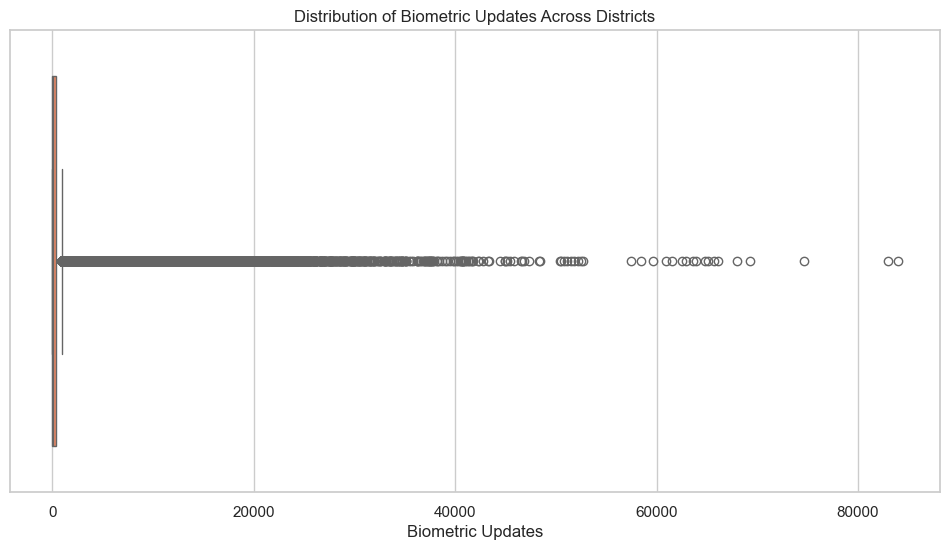

In [21]:
sns.boxplot(
    x=df["total_biometric_updates"],
    color="coral"
)

plt.title("Distribution of Biometric Updates Across Districts")
plt.xlabel("Biometric Updates")
plt.show()


Enrolment vs Updates Relationship

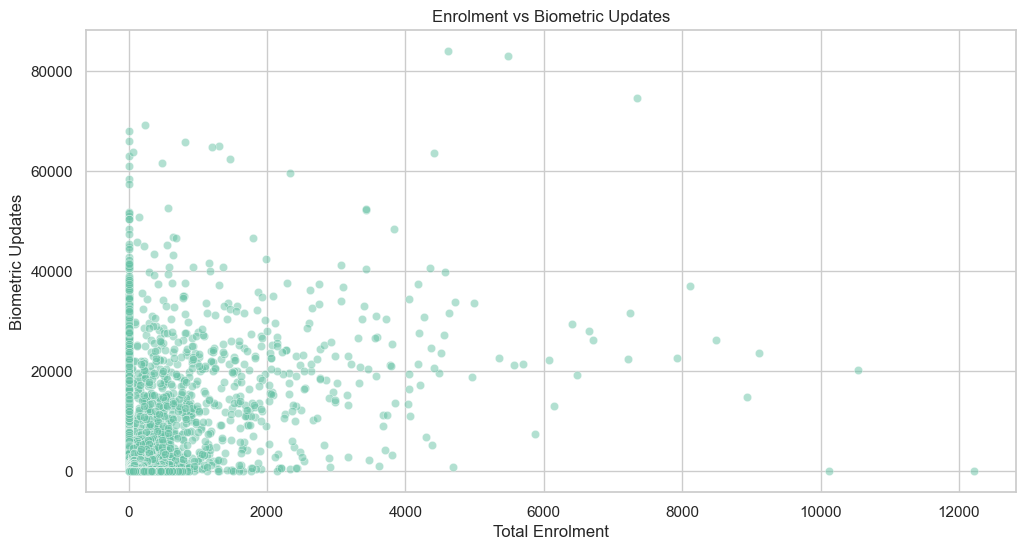

In [22]:
sns.scatterplot(
    data=df,
    x="total_enrolment",
    y="total_biometric_updates",
    alpha=0.5
)

plt.title("Enrolment vs Biometric Updates")
plt.xlabel("Total Enrolment")
plt.ylabel("Biometric Updates")
plt.show()


Monthly Seasonality

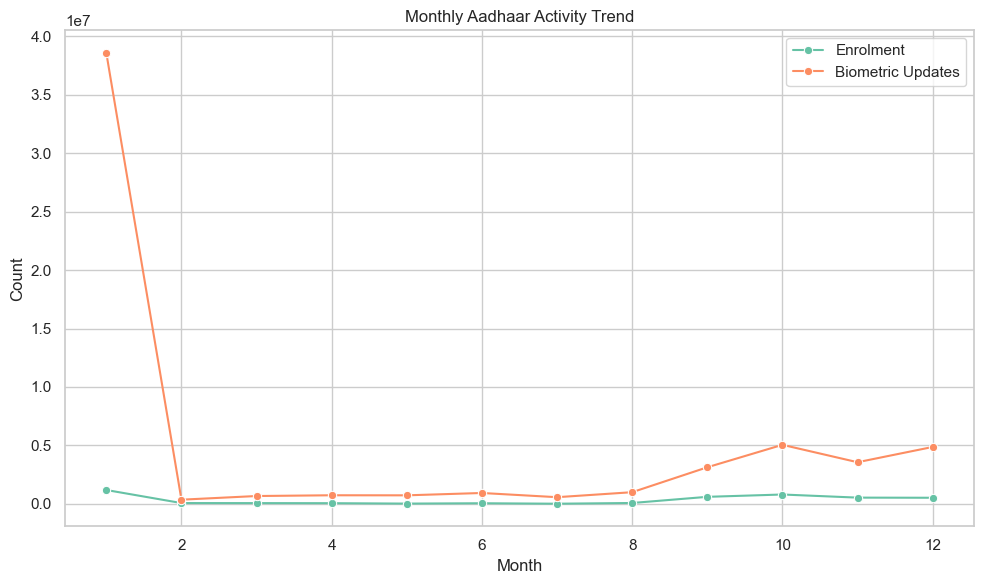

In [31]:
df["month"] = df["date"].dt.month

monthly = df.groupby("month").sum(numeric_only=True)

plt.figure(figsize=(10,6))
sns.lineplot(
    x=monthly.index,
    y=monthly["total_enrolment"],
    marker="o",
    label="Enrolment"
)

sns.lineplot(
    x=monthly.index,
    y=monthly["total_biometric_updates"],
    marker="o",
    label="Biometric Updates"
)

plt.title("Monthly Aadhaar Activity Trend")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

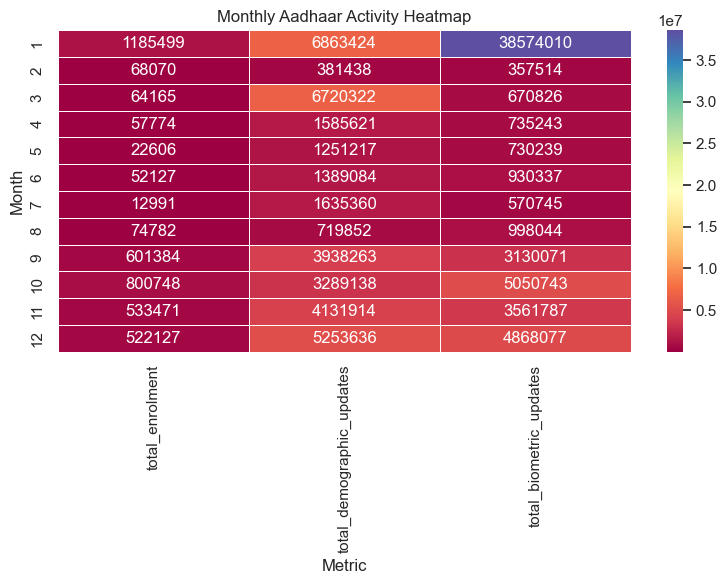

In [32]:
monthly_heat = (
    df.groupby("month")[[
        "total_enrolment",
        "total_demographic_updates",
        "total_biometric_updates"
    ]]
    .sum()
)

plt.figure(figsize=(8,6))
sns.heatmap(
    monthly_heat,
    cmap="Spectral",
    annot=True,
    fmt=".0f",
    linewidths=0.5
)

plt.title("Monthly Aadhaar Activity Heatmap")
plt.xlabel("Metric")
plt.ylabel("Month")
plt.tight_layout()
plt.show()


Data Availability Validation

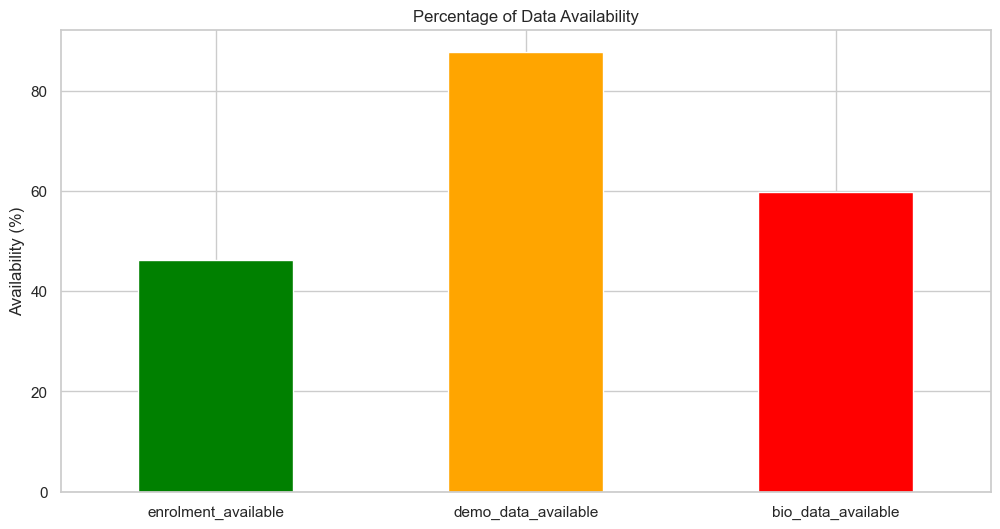

In [24]:
availability = df[[
    "enrolment_available",
    "demo_data_available",
    "bio_data_available"
]].mean() * 100

availability.plot(kind="bar", color=["green", "orange", "red"])
plt.title("Percentage of Data Availability")
plt.ylabel("Availability (%)")
plt.xticks(rotation=0)
plt.show()


STATE-WISE HEATMAP

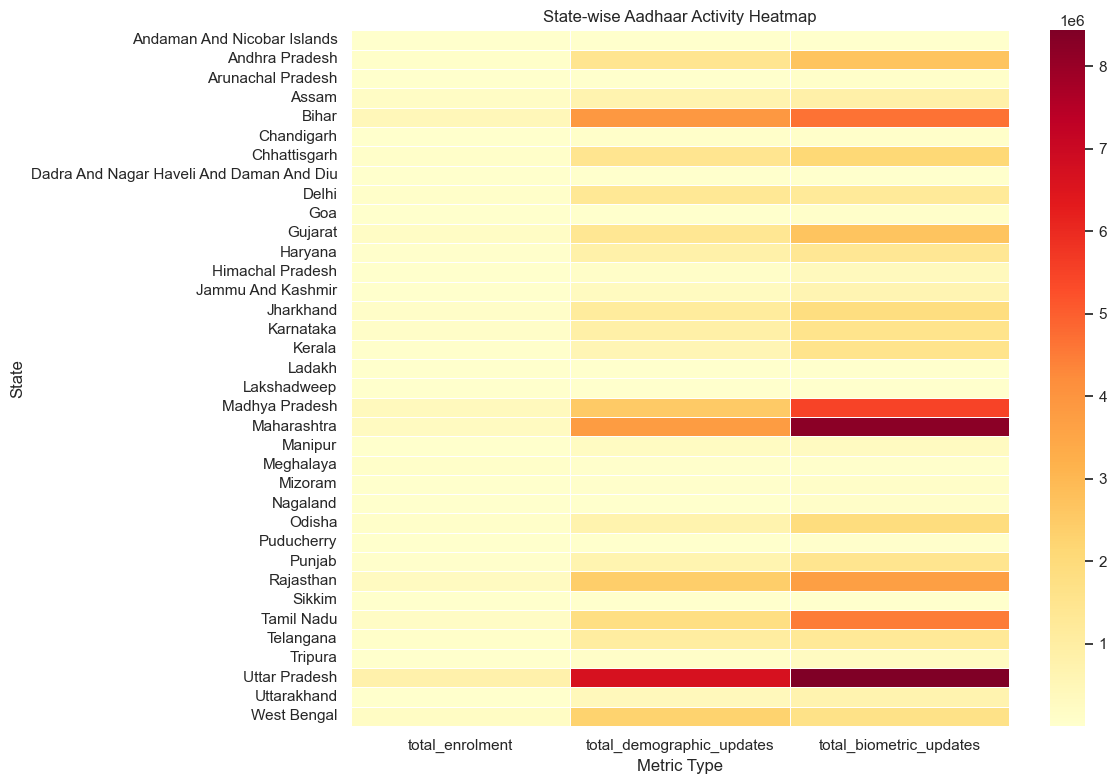

In [25]:
state_summary = (
    df.groupby("state")[[
        "total_enrolment",
        "total_demographic_updates",
        "total_biometric_updates"
    ]]
    .sum()
)

plt.figure(figsize=(12,8))
sns.heatmap(
    state_summary,
    cmap="YlOrRd",
    linewidths=0.5
)

plt.title("State-wise Aadhaar Activity Heatmap")
plt.xlabel("Metric Type")
plt.ylabel("State")
plt.tight_layout()
plt.show()

TOP DISTRICTS HEATMAP

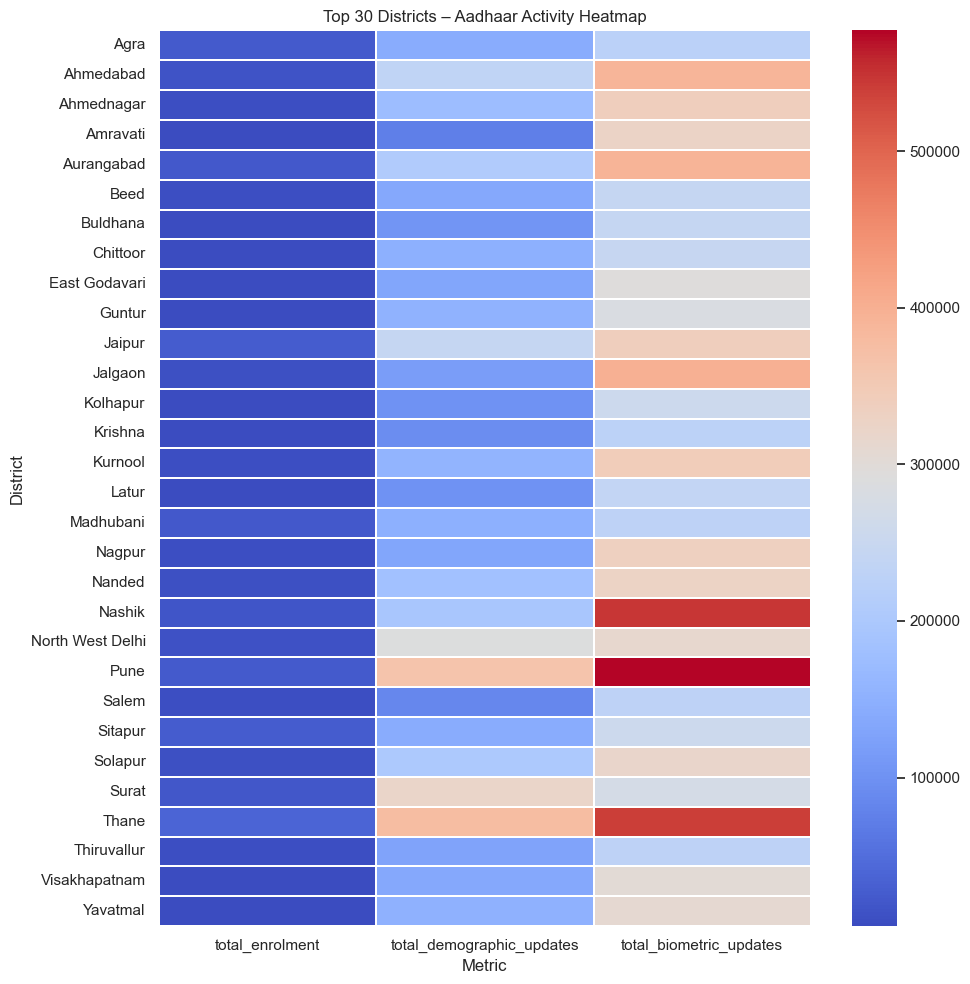

In [26]:
top_districts = (
    df.groupby("district")["total_biometric_updates"]
    .sum()
    .sort_values(ascending=False)
    .head(30)
    .index
)

district_heat = (
    df[df["district"].isin(top_districts)]
    .groupby("district")[[
        "total_enrolment",
        "total_demographic_updates",
        "total_biometric_updates"
    ]]
    .sum()
)

plt.figure(figsize=(10,10))
sns.heatmap(
    district_heat,
    cmap="coolwarm",
    linewidths=0.3
)

plt.title("Top 30 Districts – Aadhaar Activity Heatmap")
plt.xlabel("Metric")
plt.ylabel("District")
plt.tight_layout()
plt.show()


TIME vs ACTIVITY HEATMAP

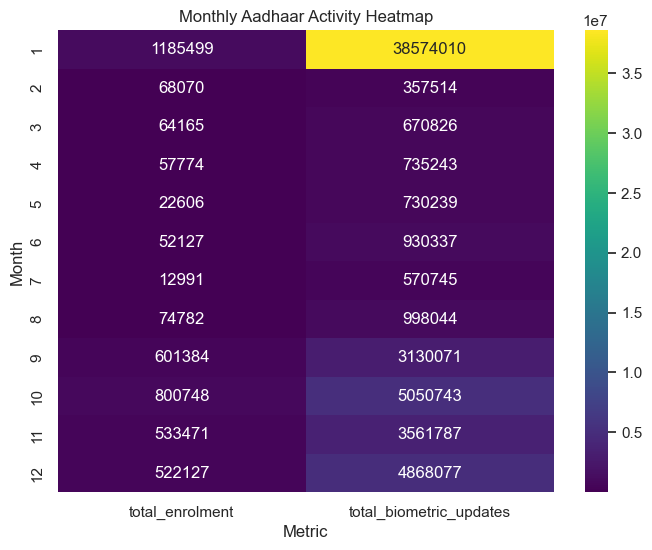

In [27]:
df["month"] = pd.to_datetime(df["date"]).dt.month

monthly_heat = (
    df.groupby("month")[[
        "total_enrolment",
        "total_biometric_updates"
    ]]
    .sum()
)

plt.figure(figsize=(8,6))
sns.heatmap(
    monthly_heat,
    cmap="viridis",
    annot=True,
    fmt=".0f"
)

plt.title("Monthly Aadhaar Activity Heatmap")
plt.xlabel("Metric")
plt.ylabel("Month")
plt.show()


DISTRICT CONSISTENCY HEATMAP

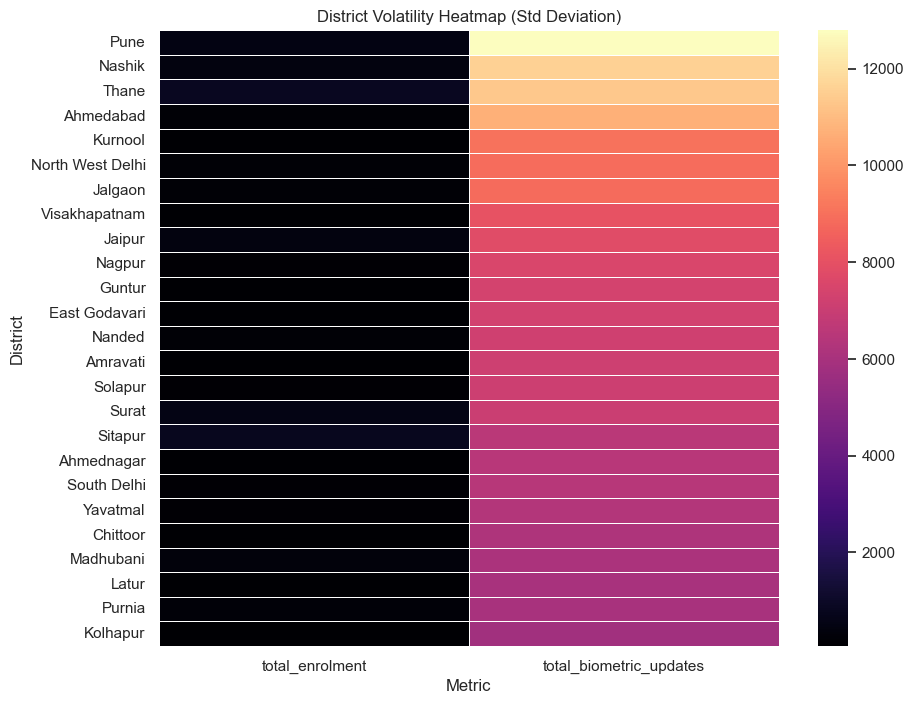

In [28]:
district_std = (
    df.groupby("district")[[
        "total_enrolment",
        "total_biometric_updates"
    ]]
    .std()
    .sort_values("total_biometric_updates", ascending=False)
    .head(25)
)

plt.figure(figsize=(10,8))
sns.heatmap(
    district_std,
    cmap="magma",
    linewidths=0.5
)

plt.title("District Volatility Heatmap (Std Deviation)")
plt.xlabel("Metric")
plt.ylabel("District")
plt.show()
